## 感知机(perceptron)
- 感知机是二分类的线性分类模型，其输入为实例的特征向量，输出为实例的类别，取+1,-1二值。感知机对应于输入空间(特征空间)中将实例划分为正负两类的分离超平面，属于判别模型。  
- 基于误分类的损失函数，利用梯度下降法对损失函数极小化，求得感知机模型。  
- 感知机学习算法简单易于实现，分为原始形式和对偶形式。它是神经网络和支持向量机的基础。  
- 调整权值，在这个点分对了，别的本来正确的点时，又分错。反反复复调整。PLA是一个一个试错的过程，而不是最优化误差函数。

## 1.感知机模型
### 定义：
假设输入空间 $\mathcal{X}\subset R^n$,输出空间$\mathcal{Y}={\{+1,-1}\}$.输入$x\in\mathcal{X}$表示实例的特征向量，对应于输入空间的点；输出$y\in \mathcal{Y}$表示实例的类别。由输入空间到输出空间到如下函数   

$$f(x)=sign (w^T x+b)$$  
称为感知机。其中w为权重，b为偏置。  
sign是符号函数，即：  
$$sign(x)=\begin{cases}
+1,\qquad x\ge 0\\
-1,\qquad x<0
\end{cases}$$
- 几何解释：线性方程  
$$w^Tx+b=0$$  
对应于特征空间$R^n$中的一个超平面S，其中w是超平面的法向量，b是超平面的截距。这个超平面将特征空间划分为两部分。位于两部分的点(特征向量)分别被分为正负两类。因此，超平面S被称为分离超平面。

## 2. 感知机学习策略
### 2.1 数据集的线性可分性
给定一个数据集$T={\{(x_1,y_1),\cdots,(x_N,y_N)}\}$,其中，$x_i\in\mathcal{X}=R^n$,$y_i\in \mathcal{Y}={\{+1,-1}\}$,$i=1,\cdots ,N$,如果存在某个超平面  
$$w^Tx_i+b=0$$  
能够将数据集的正实例点和负实例点完全正确地划分到超平面的两侧，则称该数据集T为线性可分数据集；否则，称数据集T线性不可分。  
### 2.2 学习策略
假设训练数据集是线性可分的，感知机学习的目标是求的一个能将训练集正负点完全正确分开的分离超平面。需要确定感知机模型参数w,b,需要一个学习策略，定义损失函数并极小化。  
损失函数的一个自然选择是误分类点的总数:  
$$J=\sum_{i=1}^N I_{y_i\neq sgn(w^Tx_i)}$$
但是，这样的损失函数并不是参数w，b的连续可导函数，不易优化。损失函数的另一个选择是误分类点到超平面S的总距离。  
 - 首先，写出输入空间$R^n$中任一点$x_0$到超平面S的距离：
 $$\dfrac{1}{\lVert w\rVert_2}|w^Tx_0+b|$$
 - 其次，对于误分类的数据$(x_i,y_i)$来说，  
 $$-y_i(w^Tx_i+b)>0$$成立。  
 
 
因此，误分类点$x_i$到超平面S的距离是：  
  $$-\dfrac{1}{\lVert w\rVert_2}y_i(w^Tx_i+b)$$  
 这样，假设超平面S的误分类点的集合是M，那么所有误分类点到超平面S的总距离为：  
 $$-\dfrac{1}{\lVert w\rVert_2}\sum_{x_i\in M}y_i(w^Tx_i+b)$$  
- 不考虑$\dfrac{1}{\lVert w\rVert_2}$，分母就可以省略。
 
 
就得到感知机学习的损失函数，记为：  
 $$L(w,b)=-\sum_{x_i\in M}y_i(w^Tx_i+b)$$   
 显然，损失函数$L(w,b)$是非负的。如果没有误分类点，损失函数为0.而且，误分类点越少，误分类点离超平面越近，损失函数值就越小。  
 

### 2.2.1 损失函数中$\dfrac{1}{\lVert w\rVert_2}$为什么可以不考虑？  
1. $\dfrac{1}{\lVert w\rVert_2}$不影响$-y_i(w^Tx_i+b)$正负的判断，即不影响算法的中间过程。感知机算法是误分类驱动的，这里需要注意的是"误分类驱动"指的是我们只需要判断$-y_i(w^Tx_i+b)$的正负来判断分类的正确与否。  
2. $\dfrac{1}{\lVert w\rVert_2}$不影响算法的最终结果，因为感知机算法最终的终止条件是所有输入都被正确分类，即不存在误分类的点。则此时损失函数为0，即分子为0，对$\dfrac{1}{\lVert w\rVert_2}$也无影响。  
故不考虑$\dfrac{1}{\lVert w\rVert_2}$，不会对算法的执行产生任何影响，反而能简化运算，提高算法执行效率。  

## 3. 感知机学习算法(PLA)
感知机学习算法是对以下最优化问题的算法：  

$$\min_{w,b} L(w,b)= -\sum_{x_i\in M}y_i(w^Tx_i+b)$$  
其中，M是误分类点的集合。  
感知机学习算法是误分类驱动的，具体采用随机梯度下降法。首先，任意选取一个超平面$w_0,b_0$,然后用梯度下降法不断极小化目标函数。  
### 注意： 
极小化过程中不是一次使M中所有误分类点的梯度下降，而是一次随机选取一个误分类点使其梯度下降。  
假设误分类点集合M是固定的，那么损失函数$L(w,b)$的梯度由：   

$$\nabla_w L(w,b)=-\sum_{x_i\in M}y_ix_i$$
$$\nabla_b L(w,b)=-\sum_{x_i\in M}y_i$$
给出。  
随机选取一个误分类点$(x_i,y_i)$，对w,b进行更新：  
$$w\leftarrow w+\eta y_i x_i$$  

$$b\leftarrow b+\eta y_i $$  
上式中，$\eta(0<\eta\le 1)$是步长，又称学习率。这样，通过迭代可以期待损失函数L(w,b)不断减小，直至为0.  
### 3.1 总结
- 算法(感知机算法的原始形式)  
  
输入：训练数据集T；学习率$\eta(0<\eta\le 1)$；  
输出：w,b;感知机模型$f(x)=sign(w^Tx+b)$.
> (1)选取初值$w_0,b_0$;  
(2)在训练集中选取数据$(x_i,y_i)$;  
(3)如果$y_i(w^Tx_i+b)\le 0$(有误分类点):    

 $$w\leftarrow w+\eta y_i x_i$$
$$b\leftarrow b+\eta y_i $$  
> (4)转至(2)，直至训练集中没有误分类点。

- 直观解释：当一个实例点被误分类，即位于分离超平面的错误一侧时，则调整$w,b$的值，使得分离超平面向该误分类点的一侧移动，以减少该误分类点与超平面间的距离，直至超平面越过该误分类点使其被正确分类。  
- 简单说明： 对于误分类点$(x_i,y_i)$，原距离(距离超平面S)为
$$-y_i(w^Tx_i+b)$$
经过一次梯度下降后，距离变为：  
$$-y_i((w+\eta y_i x_i)^Tx_i+b+\eta y_i)$$  
则有：
$$
\begin{eqnarray}
-y_i((w+\eta y_i x_i)^Tx_i+b+\eta y_i)&=&-y_i(w^Tx_i+\eta y_i x_i^Tx_i+b+\eta y_i)\notag\\
&=&-y_i(w^Tx_i+b)-\eta y^2_i x_i^Tx_i-\eta y^2_i\notag\\
&\le&-y_i(w^Tx_i+b)\notag
\end{eqnarray}
$$

### 3.2 实例应用 
例：对于如图所示的训练数据集，其正实例点为$x_1=(3,3)^T,x_2=(4,3)^T$,负实例点为：$x_3=(1,1)^T$.试用感知机学习算法的原始形式求解感知机模型，这里$w=(w^{(1)},w^{(2)})^T$,$x=(x^{(1)},x^{(2)})^T$.

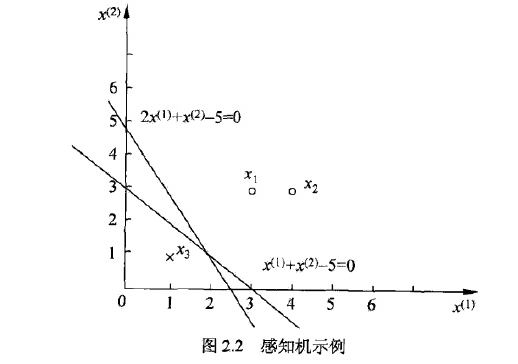

In [50]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/4.png")

In [4]:
%matplotlib inline
import copy

# An example ,the training set and parameters' sizes are fixed
training_set=[[(3,3),1],[(4,3),1],[(1,1),-1]]
w = [0, 0]
b = 0

def update(item):
    '''
    update parameters using stochastic gradient descent
    :param item: an item which is classified into wrong class
    : return: nothing
    '''
    global w, b, history
    
    w[0] += 1*item[1]*item[0][0]
    w[1] += 1*item[1]*item[0][1]
    b += 1*item[1]
    print([w,b])
    
def cal(item):
    '''
    caculate the functional distance between 'item' and the decision
    surface. output y_i(w*x_i+b)
    :param item:
    :return:
    '''
    
    res=0
    for i in range(len(item[0])):
        res += item[0][i]*w[i]
    res += b
    res *=item[1]
    return res

def check():
    '''
    check if the hyperplane can classify the examples correctly
    :return: true if it can
    '''
    flag = False
    for item in training_set:
        if cal(item)<= 0:
            flag = True
            update(item)
    # draw a graph to show the process
    if not flag:
        print('RESULT: w:'+ str(w) + 'b:'+str(b))
    return flag

if __name__=="__main__":
    for i in range(1000):
        if not check():break

[[3, 3], 1]
[[2, 2], 0]
[[1, 1], -1]
[[0, 0], -2]
[[3, 3], -1]
[[2, 2], -2]
[[1, 1], -3]
RESULT: w:[1, 1]b:-3


In [12]:
# 自己写的简易版的code
training_set=[[(3,3),1],[(4,3),1],[(1,1),-1]]
def train_model(lrate):
    w=[0.0,0.0]
    b=0.0
    lrate=1
    for i in range(1000):
        for item in training_set:
            x=item[0]
            y=item[1]
            if y*(x[0]*w[0]+x[1]*w[1]+b)<= 0:
                w[0] += lrate*y*x[0]
                w[1] += lrate*y*x[1]
                b += lrate*y
                #print(w,b)
    #print('stop training:'),
    #print(w[0],w[1],b)
    return (w,b)

In [13]:
train_model(1)

([1.0, 1.0], -3.0)

In [14]:
train_model(0.5)

([1.0, 1.0], -3.0)

In [15]:
# 测试函数
def test(test_data,lrate):
    weight,bias=train_model(lrate)
    y=[]
    for it in test_data:
        if it[0]*weight[0]+it[1]*weight[1]+bias >= 0.0:
            y.append(1)
        else:
            y.append(-1)
    return y       

In [16]:
test_data=[[3,3.4],[4.3,3],[1,1.5]]
print(test(test_data,1))

[1, 1, -1]


### 注意：
感知机学习算法在采用不同的初值或选取不同的误分类点，解可以不同。

### 3.3 感知机的另一种学习算法(感知机神经网络的学习）
将权重和偏置项初始化为0，然后，利用下面的感知器规则迭代的修改$w_i$和b，直到训练完成。 
损失函数的一个自然选择是误分类点的总数:  
$$J=\sum_{i=1}^N I_{y_i\neq sgn(w^Tx_i)}$$  
基于该损失函数，我们也可以得到如下学习规则：  

- 对单个训练样例$(x_k,y_k)$,$x_k=(x_k^{(1)},\cdots,x_k^{(n)})^T$共有n个特征。  
若当前感知机的输出为$\hat{y}_k$,
则感知机的权重将这样调整：
 $$w_i\leftarrow w_i+\Delta w_i$$  
$$b\leftarrow b+\Delta b $$ 
其中：
$$\Delta w_i=\eta (y_k-\hat{y}_k)x_k^{(i)}$$  
$$\Delta b=\eta(y_k-\hat{y}_k)$$  
这里 $w_i$是与输入$x_k^{(i)}$对应的权重项，b是偏置项，$\eta$为学习率，其作用是控制每一步调整权的幅度。   
- 写成向量形式也可为：
$$\Delta w=\eta (y_k-\hat{y}_k)x_k$$   
- 直观解释：  
在监督学习的过程中，当$y\in\mathcal{y}={\{-1,1}\}$，  
真实值和估计值之间差值$(y_k-\hat{y}_k)$一共四种情况： 

\begin{eqnarray}
\Delta w&=&\eta (1-1)x_k=0\notag\\
\Delta w&=&\eta (-1-(-1))x_k=0\notag\\
\Delta w&=&\eta (1-(-1))x_k=\eta2 x_k\notag\\
\Delta w&=&\eta (-1-1)x_k=\eta(-2) x_k\notag\\
\end{eqnarray}  

> 前两种是分类正确的情况，权重更新大小为0.  
后两种是分类错误是的权重更新大小，等价于
$$\Delta w=\eta' y_kx_k$$
其中$\eta'=2\eta$，此时与第一种学习算法相同。
  
- 注意：
>  (1)在这里我们均使用随机梯度下降算法对算法进行优化,当然基于批量随机梯度也可以做。  
(2)这里的规则与上面的规则有相通的地方。尤其是当$y\in\mathcal{y}={\{-1,1}\}$时，两种规则基本相同。

In [65]:
class Perceptron(object):
    def __init__(self,input_num,activator):
        '''
        初始化感知器，设置输入参数的个数，以及激活函数
        '''
        self.activator=activator
        # 权重向量初始化为0
        self.weights=[0.0 for _ in range(input_num)]
        # 偏置项初始化为0
        self.bias=0.0
    def __str__(self):
        '''
        打印学习到的权重，偏置项
        '''
        return 'weights\t:%s\n bias\t:%f\n'%(self.weights,self.bias)
    def predict(self,input_vec):
        '''
        输入向量，输出感知器的计算结果
        '''
        from functools import reduce
        return self.activator( 
           reduce(lambda a, b: a + b,
                 [x*w for x,w in zip(input_vec,self.weights)],0.0)+self.bias)
    def _update_weights(self,input_vec,output,label,rate):
        '''
        按照 感知器规则更新权重
        打包输入和权重，利用感知器更新
        '''
        error=label-output
        self.weights= [w+rate*error*x for x,w in zip(input_vec,self.weights)]
        # 更新bias
        self.bias += rate*error
    def _one_iteration(self,input_vecs,labels,rate):
        '''
        一次迭代，运行一次所有数据
        打包输入输出，zip
        每个训练样本时(input_vec, labels)
        对每个样本，按照感知器规则更新权重
        '''
        samples = zip(input_vecs, labels)
        for (input_vec,label) in samples:
            output=self.predict(input_vec)
            self._update_weights(input_vec,output,label,rate)
    def train(self,input_vecs, labels, iteration, rate):
        '''
        输入训练数据，以及循环次数，学习率
        '''
        for i in range(iteration):
            self._one_iteration(input_vecs,labels,rate)

下面我们使用写好的代码实现一个计算and功能的感知机

In [68]:
def and_f(x):
    '''
    定义激活函数
    '''
    return 1 if x>0 else 0
if __name__ == '__main__':
    X=[[0,0],[0,1],[1,0],[1,1]]
    y=[0,0,0,1]
    # 训练 and 感知机
    and_perceptron=Perceptron(2,and_f)
    and_perceptron.train(X,y,10,0.1)
    print(and_perceptron)
    # 测试
    print('1 and 1 = %d'% and_perceptron.predict([1,1]))
    print('1 and 0 = %d'% and_perceptron.predict([1,0]))
    print('0 and 1 = %d'% and_perceptron.predict([0,1]))
    print('0 and 0 = %d'% and_perceptron.predict([0,0]))

weights	:[0.2, 0.1]
 bias	:-0.200000

1 and 1 = 1
1 and 0 = 0
0 and 1 = 0
0 and 0 = 0


scikit-learn中的感知机

In [80]:
from sklearn import linear_model
import numpy as np
lmper=linear_model.Perceptron(n_iter=10)
lmper.fit(X,y)
print(lmper.coef_)
print(lmper.intercept_)
print('1 and 1 = %d'% lmper.predict(np.array([1,1]).reshape(1,2)))
print('1 and 0 = %d'% lmper.predict(np.array([1,0]).reshape(1,2)))
print('0 and 1 = %d'% lmper.predict(np.array([0,1]).reshape(1,2)))
print('0 and 0 = %d'% lmper.predict(np.array([0,0]).reshape(1,2)))

[[ 3.  2.]]
[-4.]
1 and 1 = 1
1 and 0 = 0
0 and 1 = 0
0 and 0 = 0


## 4. 算法的收敛性

## 感知机模型（双层神经网络模型：输入层和计算单元，瓶颈：XOR问题——线性不可分）
2）多层神经网络（解决线性不可分问题——在感知机的神经网络上多加一层，并利用“后向传播”（Back-propagation）学习方法，可以解决XOR问题）（1974年，哈佛博士论文）

（3）BP算法训练的神经网络：信号正向传播和误差反向传播（修正权值）
- 简单的单层感知机只能解决线性问题，不能解决异或问题，因为它线性不可分。
### 证明可由感知机算法的收敛性得来
感知机的学习策咯是极小化误分类点到超平面S的总距离，即经验风险最小化。对于线性不可分数据集，由于总是存在误分类点，算法将不能够收敛。事实上，最后的迭代（随机梯度下降）将发生震荡，证明过程见Novikoff定理。